## Jet Analysis(Nuclear Modification Factor)( $R_{\mathrm{AA}}$)

# Preparations
Please set path of jet data files for both pp and PbPb.
Also if you use jet cone size different from $R=0.4$, please change the value jetR below.

# Loading all the files

In [1]:
# Set File Paths
# Please set the path for pp jet data file
file_pp = '../../data/music_cms/cms_pp_vir0.5_R0.4_trkpT4.0_maxT250_pt200-1001_m1-7_merged_352683.dat'

# Please set the value of jet cone size you used in the jet reconstruction
jetR = 0.4


In [2]:
# Please set the path for pbpb jet data file
file_pbpb = '../../data/music_cms/LBT/R0.4/cms_music_0-10_R0.4_s1-7_35k.dat'
file_pbpb1 = '../../data/music_cms/MARTINI/R0.4/cms_martini_0-10_R0.4_s1-6_12790.dat'
file_pbpb2 = '../../data/music_cms/ADS/R0.4/cms_ads_0-10_R0.4_s1-4_6461.dat'

In [3]:
# preperations
import numpy as np
import matplotlib.pyplot as plt

# pi and 2pi 
pi = 3.1415926
twopi = 2.0*pi

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

In [4]:
def ratio_error(v1,e1,v2,e2):
  #v1, e1: numerator value and error
  #v2, e2: denominator value and error  
  error1 = e1/v2
  error2 = (e2/v2)*(v1/v2)
  error = np.sqrt(error1*error1+error2*error2)
  return error

In [5]:
# Load files
data_pp = np.loadtxt(file_pp, delimiter=',')
data_pbpb = np.loadtxt(file_pbpb, delimiter=',')
data_pbpb1 = np.loadtxt(file_pbpb1, delimiter=',')
data_pbpb2 = np.loadtxt(file_pbpb2, delimiter=',')

# Indices of the data array
i_pp = data_pp[:,0] 
i_pbpb = data_pbpb[:,0] 
i_pbpb1 = data_pbpb1[:,0]
i_pbpb2 = data_pbpb2[:,0]


# Get Indices of jets in the data array
jet_id_pp = np.where(i_pp < 0.1)
jet_id_pbpb = np.where(i_pbpb < 0.1)
jet_id_pbpb1 = np.where(i_pbpb1 < 0.1)
jet_id_pbpb2 = np.where(i_pbpb2 < 0.1)

# Extract jets
jets_pp = data_pp[jet_id_pp]
jets_pbpb = data_pbpb[jet_id_pbpb]
jets_pbpb1 = data_pbpb1[jet_id_pbpb1]
jets_pbpb2 = data_pbpb2[jet_id_pbpb2]

# Extract associated charged particles for pp
assoc_pp= []
for i in range(len(jet_id_pp[0])-1):
  chunck = data_pp[jet_id_pp[0][i]+1:jet_id_pp[0][i+1]]
  assoc_pp.append(chunck)
chunck = data_pp[jet_id_pp[0][-1]+1:]
assoc_pp.append(chunck)

# Extract associated charged particles for pbpb
assoc_pbpb= []
for i in range(len(jet_id_pbpb[0])-1):
  chunck = data_pbpb[jet_id_pbpb[0][i]+1:jet_id_pbpb[0][i+1]]
  assoc_pbpb.append(chunck)
chunck = data_pbpb[jet_id_pbpb[0][-1]+1:]
assoc_pbpb.append(chunck)

assoc_pbpb1= []
for i in range(len(jet_id_pbpb1[0])-1):
  chunck = data_pbpb1[jet_id_pbpb1[0][i]+1:jet_id_pbpb1[0][i+1]]
  assoc_pbpb1.append(chunck)
chunck = data_pbpb1[jet_id_pbpb1[0][-1]+1:]
assoc_pbpb1.append(chunck)

assoc_pbpb2= []
for i in range(len(jet_id_pbpb2[0])-1):
  chunck = data_pbpb2[jet_id_pbpb2[0][i]+1:jet_id_pbpb2[0][i+1]]
  assoc_pbpb2.append(chunck)
chunck = data_pbpb2[jet_id_pbpb2[0][-1]+1:]
assoc_pbpb2.append(chunck)

## Jet-$R_{\mathrm{AA}}$

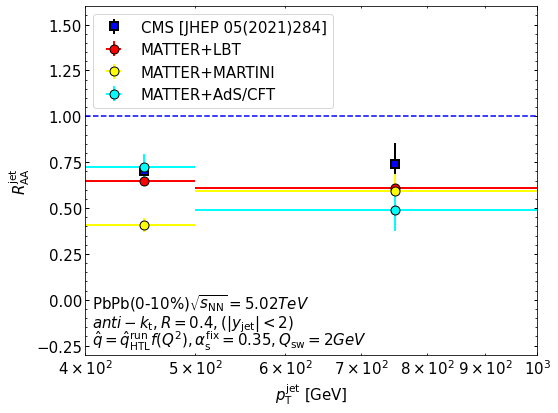

In [7]:
# Prepare arrays of Jet-pT
jet_pt_pp_in = jets_pp[:,1]
jet_pt_pbpb_in = jets_pbpb[:,1]
jet_pt_pbpb1_in = jets_pbpb1[:,1]
jet_pt_pbpb2_in = jets_pbpb2[:,1]

bins_13 = [400,500,1000]
y_axis13= [0.704,0.742]
yerror_13 =[0.086,0.111]

pt_min = 400
pt_max = 1000

n_ev_pp = 352683
n_ev_pbpb = 35000
n_ev_pbpb1 = 12790
n_ev_pbpb2 = 6461
sigma = 5.15
d_eta = 2*2

# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins= bins_13 )
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins= bins_13 )
n_pbpb1, pt = np.histogram(jet_pt_pbpb1_in, bins= bins_13 )
n_pbpb2, pt = np.histogram(jet_pt_pbpb2_in, bins= bins_13 )

# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)
err_n_pbpb1 = np.sqrt(n_pbpb1)
err_n_pbpb2 = np.sqrt(n_pbpb2)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum
dn_dpt_pp = (n_pp*sigma)/n_ev_pp/dpt/d_eta
dn_dpt_pbpb = (n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta
dn_dpt_pbpb1 = (n_pbpb1*sigma)/n_ev_pbpb1/dpt/d_eta
dn_dpt_pbpb2 = (n_pbpb2*sigma)/n_ev_pbpb2/dpt/d_eta

# Errors 
err_dn_dpt_pp = (err_n_pp*sigma)/n_ev_pp/dpt/d_eta
err_dn_dpt_pbpb = (err_n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta
err_dn_dpt_pbpb1 = (err_n_pbpb1*sigma)/n_ev_pbpb1/dpt/d_eta
err_dn_dpt_pbpb2 = (err_n_pbpb2*sigma)/n_ev_pbpb2/dpt/d_eta

# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dpt_pbpb/dn_dpt_pp
error_raa = ratio_error(dn_dpt_pbpb,err_dn_dpt_pbpb,dn_dpt_pp,err_dn_dpt_pp)

raa1 =  dn_dpt_pbpb1/dn_dpt_pp
error_raa1 = ratio_error(dn_dpt_pbpb1,err_dn_dpt_pbpb1,dn_dpt_pp,err_dn_dpt_pp)

raa2 =  dn_dpt_pbpb2/dn_dpt_pp
error_raa2 = ratio_error(dn_dpt_pbpb2,err_dn_dpt_pbpb2,dn_dpt_pp,err_dn_dpt_pp)


plt.errorbar(pt, y_axis13,ms=8,mfc='blue',mec='black',mew=2,fmt= 's',label="CMS [JHEP 05(2021)284]",
            xerr=None, yerr=yerror_13, color='black')

plt.errorbar(pt, raa, ms=9,mfc='red',mec='black',fmt='o', label=r"MATTER+LBT",
             xerr=0.5*dpt, yerr=error_raa, color='red')

plt.errorbar(pt, raa1, ms=9,mfc='yellow',mec='black',fmt='o', label=r"MATTER+MARTINI",
             xerr=0.5*dpt, yerr=error_raa1, color='yellow')

plt.errorbar(pt, raa2, ms=9,mfc='cyan',mec='black',fmt='o', label=r"MATTER+AdS/CFT",
             xerr=0.5*dpt, yerr=error_raa2, color='cyan')



#axes setting
plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$R^{\mathrm{jet}}_{\mathrm{AA}}$")
plt.xlim(pt_min,pt_max)
plt.ylim(-0.3,1.6)
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=1.5) 
plt.text(pt_min+5,-0.05, r"PbPb(0-10%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min+5,-0.15,r'$anti-k_{\mathrm{t}},R=0.4,(|y_{\mathrm{jet}}|<2)$')
plt.text(pt_min+5,-0.25,r"$\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.35,Q_{\mathrm{sw}}=2GeV$")

# save plot to the Desktop
plt.tight_layout()
plt.savefig('Raa(0-10)')